***Please if this is useful, please upvote !!***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2021.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2022.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2018.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2019.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2017.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings 2020.csv
/kaggle/input/qs-world-university-rankings-2021/QS World University Rankings combined.csv


**Loading Data**

In [2]:
qs_17 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2017.csv")
qs_18 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2018.csv")
qs_19 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2019.csv")
qs_20 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2020.csv")
qs_21 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2021.csv")
qs_22 = pd.read_csv("../input/qs-world-university-rankings-2021/QS World University Rankings 2022.csv")

In [3]:
qs_17.info()
qs_18.info()
qs_19.info()
qs_20.info()
qs_21.info()
qs_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          933 non-null    int64  
 1   rank_display  914 non-null    object 
 2   university    933 non-null    object 
 3   score         400 non-null    float64
 4   link          933 non-null    object 
 5   country       933 non-null    object 
 6   city          918 non-null    object 
 7   region        933 non-null    object 
 8   logo          933 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 65.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          977 non-null    int64  
 1   rank_display  976 non-null    object 
 2   university    977 non-null    object 
 3   score         400 non-null    float6

In [4]:
qs_17.head()

,year,rank_display,university,score,link,country,city,region,logo
0,2017,1,Massachusetts Institute of Technology (MIT),100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
1,2017,2,Stanford University,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...
2,2017,3,Harvard University,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...
3,2017,4,University of Cambridge,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...
4,2017,5,California Institute of Technology (Caltech),96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...


**Tidying Data**

In [5]:
data = {"df_17": qs_17, "df_18" : qs_18,"df_19": qs_19, "df_20" : qs_20,"df_21": qs_21, "df_22" : qs_22}
list(data.keys())

['df_17', 'df_18', 'df_19', 'df_20', 'df_21', 'df_22']

**Visualize each Region's number of universities in the QS World University Ranking**

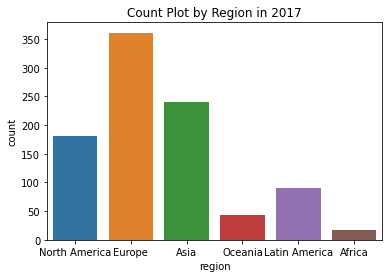

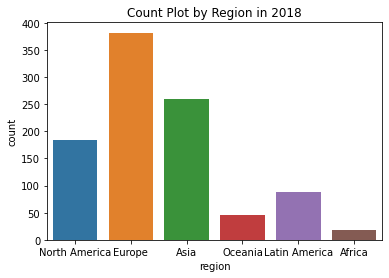

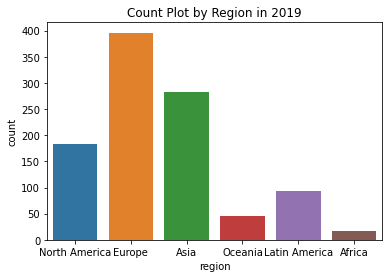

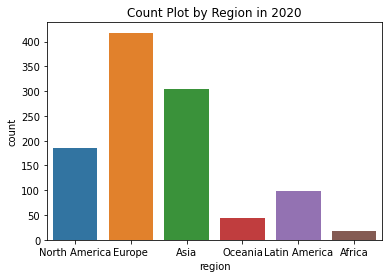

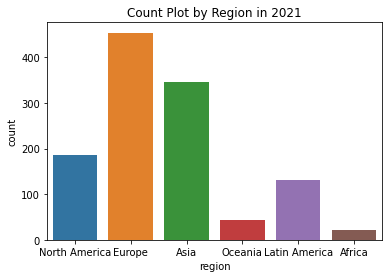

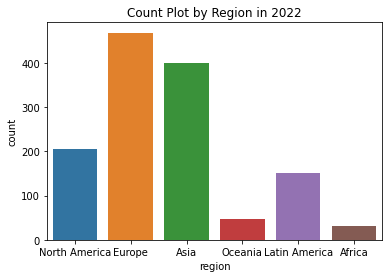

In [6]:
#Analysis Based on the Region

years = list(data.keys())
y_ = ["2017", "2018", "2019", "2020", "2021", "2022"]
for year, y in zip(years, y_):
    sns.countplot(x = "region", data = data[year]).set_title("Count Plot by Region in " + y)
    plt.show()

**Visualize each Country's number of universities in the QS World University Ranking**

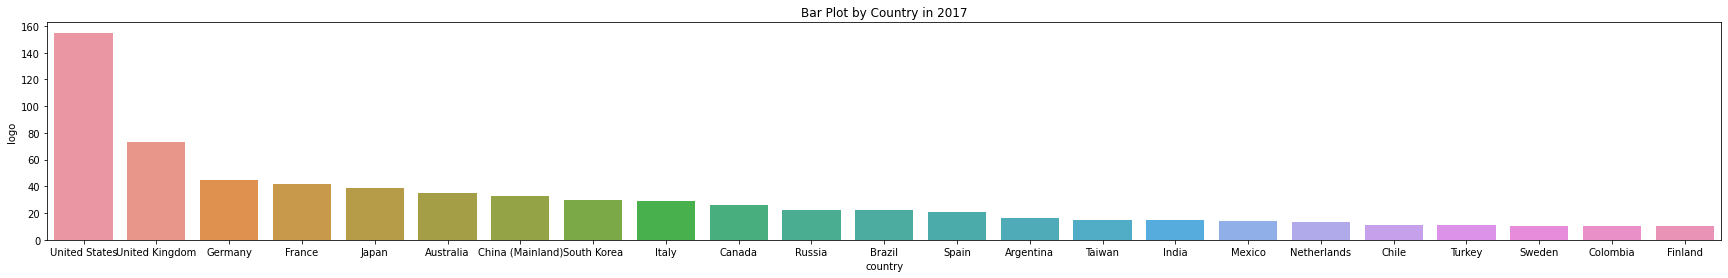

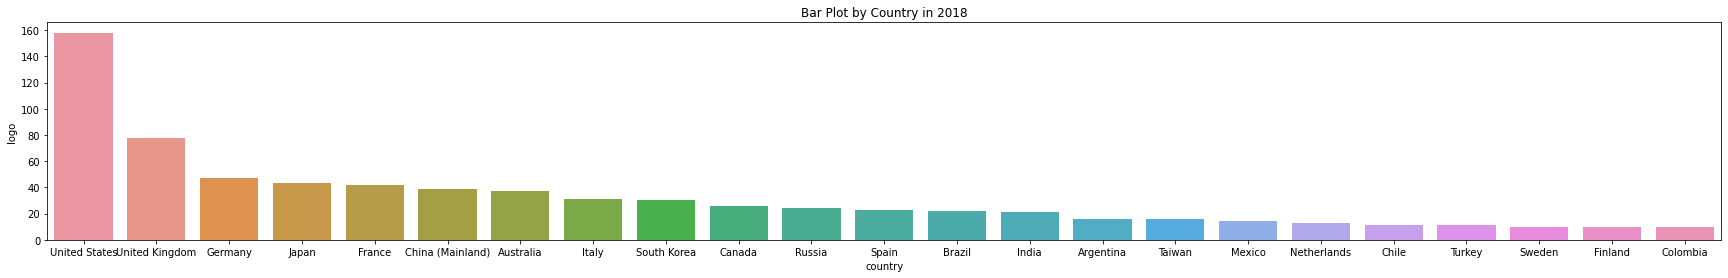

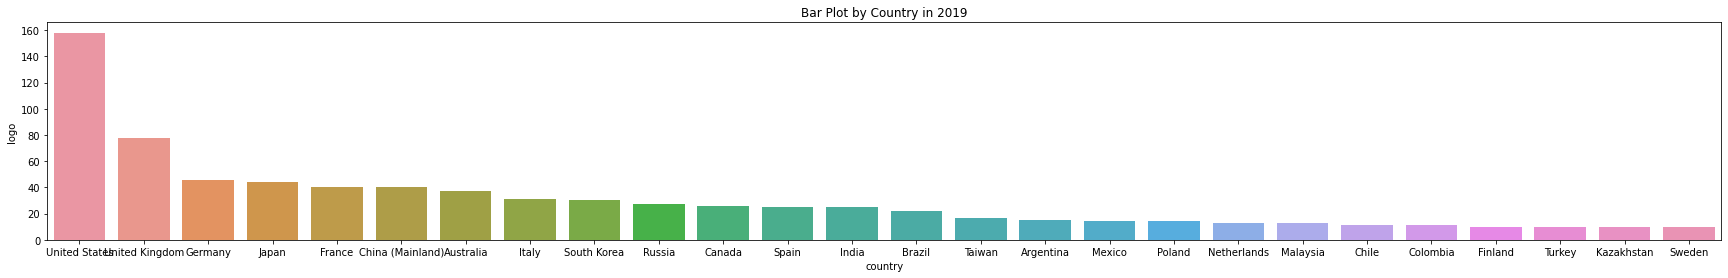

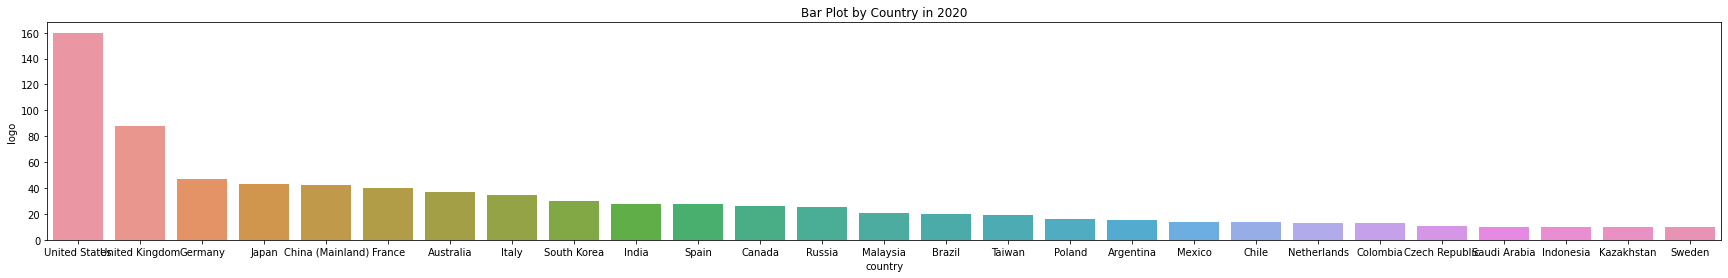

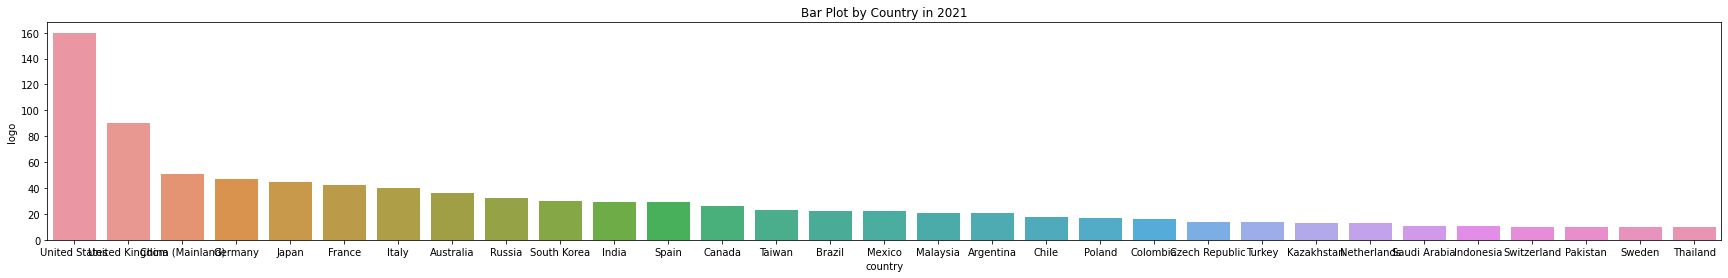

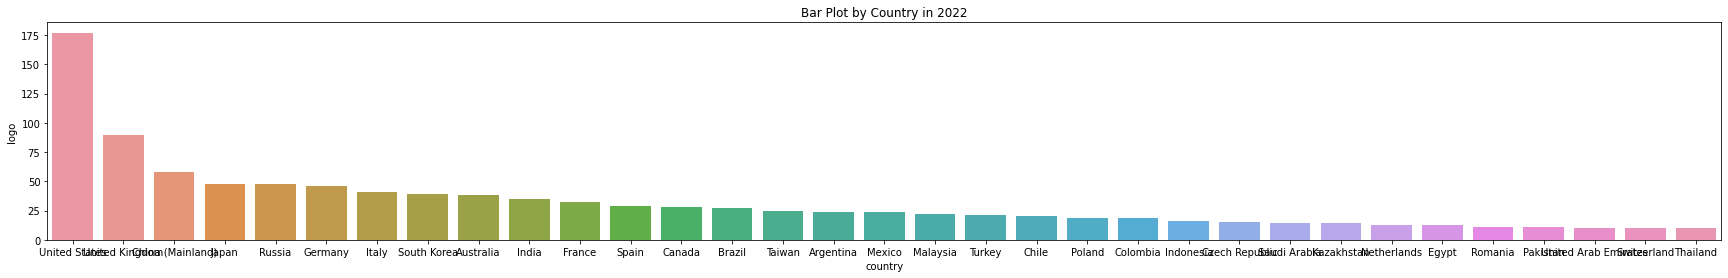

In [7]:
#Analysis Based on the Country (Show countries that owns the number of universities on the rank over 10)

for year, y in zip(years, y_):
    plt.figure(figsize=(30,4))
    df = data[year].groupby(["country"]).agg("count").sort_values(by=["logo"], ascending = False).reset_index()
    sns.barplot(x = "country", y = "logo", data = df[df["logo"]>= 10]).set_title("Bar Plot by Country in " + y)
    plt.show()

**Visualize each City's number of universities in the QS World University Ranking**

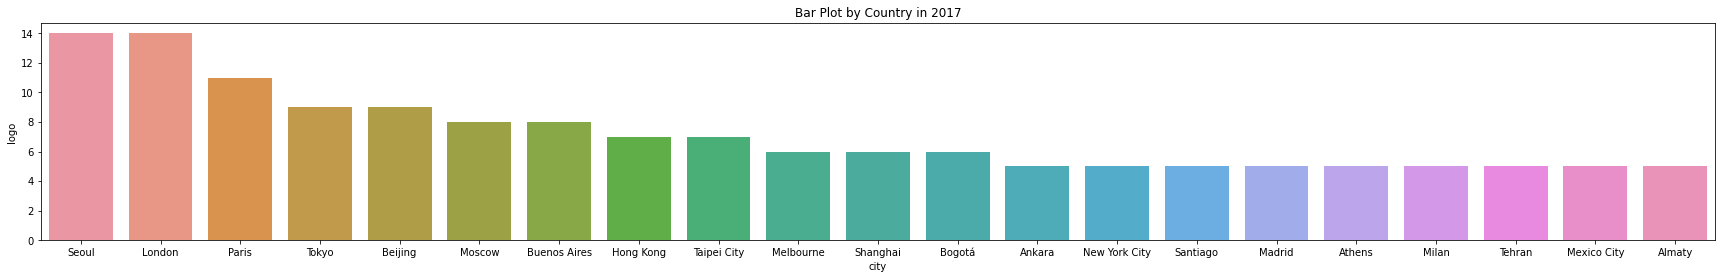

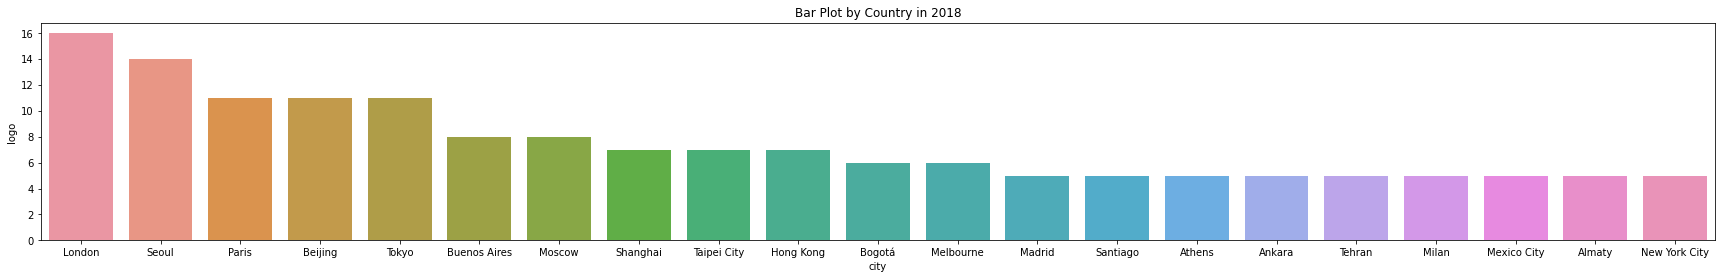

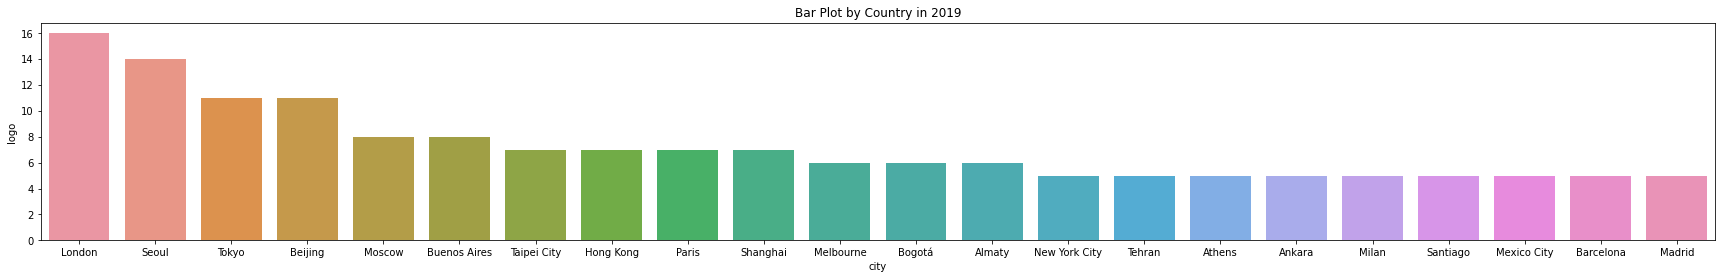

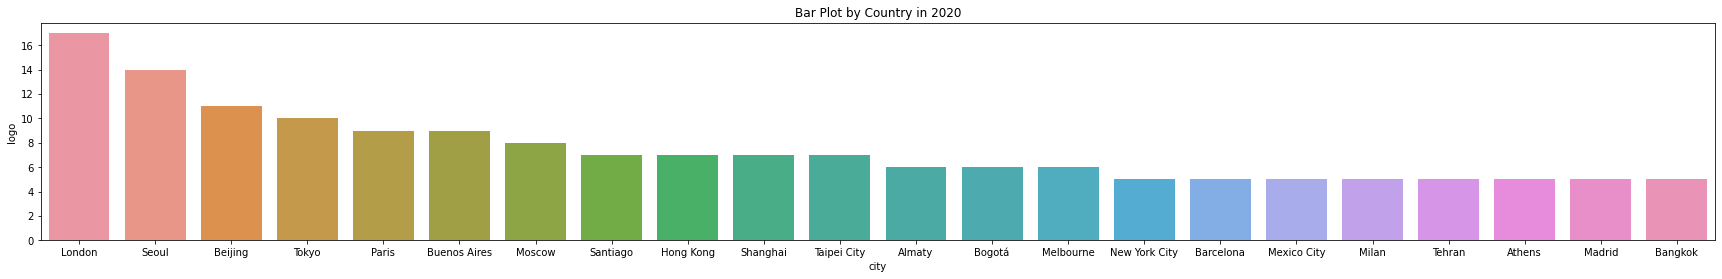

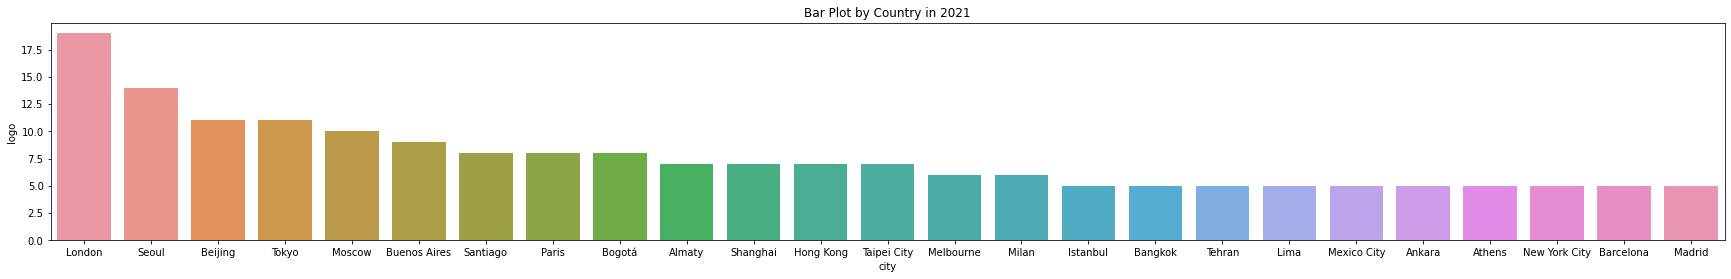

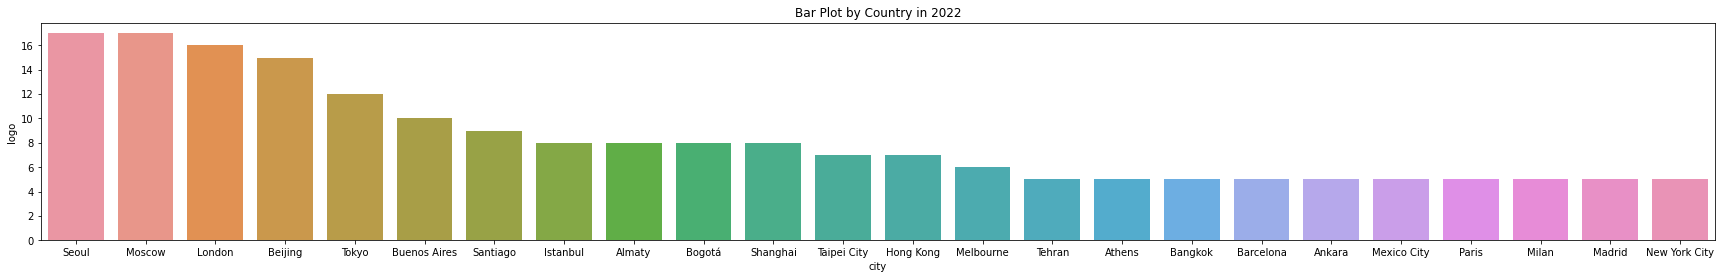

In [8]:
#Analysis Based on the City (Show countries that owns the number of universities on the rank over 5)

for year, y in zip(years, y_):
    plt.figure(figsize=(30,4))
    df = data[year].groupby(["city"]).agg("count").sort_values(by=["logo"], ascending = False).reset_index()
    sns.barplot(x = "city", y = "logo", data = df[df["logo"]>= 5]).set_title("Bar Plot by Country in " + y)
    plt.show()

**Performance of The top 10 universities (in 2017) in these six years**

In [9]:
#Observe the trend of the top 10 school's score variation in these years
qs = qs_17
year = years[1:]
for year in years:
    qs = qs.merge(data[year][["university", "score"]], on=['university'], how='outer')

qs = qs.iloc[:10, [2, 3, 9, 10, 11, 12, 13, 14]]
qs.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'score_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,university,score_x,score_y,score_x,score_y,score_x,score_y,score
0,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,Stanford University,98.7,98.7,98.7,98.6,98.4,98.4,98.7
2,Harvard University,98.3,98.3,98.4,98.5,97.4,97.9,98.0
3,University of Cambridge,97.2,97.2,95.6,95.6,95.0,94.3,98.7
4,California Institute of Technology (Caltech),96.9,96.9,97.7,97.2,96.9,97.0,97.4
5,University of Oxford,96.8,96.8,95.3,96.8,97.2,96.7,99.5
6,UCL,95.6,95.6,94.6,92.9,94.8,92.9,95.4
7,ETH Zurich - Swiss Federal Institute of Techno...,94.2,94.2,93.3,95.3,95.9,95.0,95.4
8,Imperial College London,94.1,94.1,93.7,93.3,94.1,93.6,97.3
9,University of Chicago,93.0,93.0,93.5,93.2,92.0,93.1,94.5


In [10]:
#Extract the university and the score of each year
universities = []
scores = []
for i in range(10):
    university = qs.iloc[i].values
    universities.append(university[0])
    score = []
    for j in range(1, len(university)):
        score.append(university[j])
    scores.append(score)

print(universities, scores)

['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'Harvard University', 'University of Cambridge', 'California Institute of Technology (Caltech)', 'University of Oxford', 'UCL', 'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'University of Chicago'] [[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], [98.7, 98.7, 98.7, 98.6, 98.4, 98.4, 98.7], [98.3, 98.3, 98.4, 98.5, 97.4, 97.9, 98.0], [97.2, 97.2, 95.6, 95.6, 95.0, 94.3, 98.7], [96.9, 96.9, 97.7, 97.2, 96.9, 97.0, 97.4], [96.8, 96.8, 95.3, 96.8, 97.2, 96.7, 99.5], [95.6, 95.6, 94.6, 92.9, 94.8, 92.9, 95.4], [94.2, 94.2, 93.3, 95.3, 95.9, 95.0, 95.4], [94.1, 94.1, 93.7, 93.3, 94.1, 93.6, 97.3], [93.0, 93.0, 93.5, 93.2, 92.0, 93.1, 94.5]]


In [11]:
from bokeh.plotting import figure, show
from bokeh.models import Legend
from bokeh.io import output_notebook
time = [2017, 2018, 2019, 2020, 2021, 2022]
colors = ["red", "green", "blue", "orange", "yellow", "purple", "brown", "pink", "black", "skyblue"]

output_notebook()
# create a plot with a title and axis labels
fig = figure(plot_width = 1000, plot_height = 500, title = "Trend of the scores of Top 10 University", x_axis_label = "year", y_axis_label = "score")

legend_it = []
# add multiple renderers
for university, score, color in zip(universities, scores, colors):
    u = str(university)
    c = fig.line(time, score, line_width = 2, color = color, alpha=0.7,
           muted_color=color, muted_alpha=0.2)
    legend_it.append((u, [c]))



legend = Legend(items=legend_it)
legend.click_policy="mute"

fig.add_layout(legend, 'right')
# show the results
show(fig)

Loading BokehJS ...

We can find that in these six years MIT is still maintaining a high-class level and keep getting 100 scores and the other apex universities (top 10 in 2017) still remain a top performance in QS World University Rankings and getting a stable score performance.